# **K-Means and Agglomerative Algorithm for Clustering Analysis**

Dataset : Facebook Live Sellers in Thailand

Link : https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand

Goal : To find the correlation of content type and publish time with the number of comments and shares

Machine Learning (Group 2)

1.   Dana Saputra (5025221003)
2.   Muhammad Ariandra Dwiratama (5025221010)
1.   Birhasani Raka Abiansyah (5025221115)
1.   Arkan Arsalan Amanullah (5025221129)
1.   Muhammad Mirza Ralfie Prasetyo (5025221220)


<a id="bagian-pertama">

# Clustering

</a>

<a id="bagian-pertama-sub-pertama">

## Import libraries

</a>

In [41]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings

## Pre-processing

In [21]:
dataset_path = "./dataset/Live_20210128.csv"
df = pd.read_csv(dataset_path)

In [22]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [23]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [24]:
# Drop column that has null value
df.drop(["Column1", "Column2", "Column3", "Column4"], axis=1, inplace=True)

In [25]:
# Drop unused column
df.drop(["status_id"], axis=1, inplace=True)

In [26]:
df['status_published'] = pd.to_datetime(df['status_published'])

# Extract the hour from the datetime and create a new column 'hour_published'
df['hour_published'] = df['status_published'].dt.hour

In [27]:
# Define hour ranges
hour_ranges = [(6, 10), (10, 14), (14, 18), (18, 21), (21, 23), (0, 6)]

# Function to map hour to range
def map_hour_to_range(hour):
    for start, end in hour_ranges:
        if start <= hour < end:
            return f"{start}-{end}"

# Apply hour range mapping
df['hour_range'] = df['hour_published'].apply(map_hour_to_range)

df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hour_published,hour_range
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6,6-10
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22,21-23
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6,6-10
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2,0-6
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3,0-6


In [28]:
# Take column for clustering
feature_names = ["num_comments", "num_shares"]
X = df[feature_names]

In [29]:
# Normalize data
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

## K-Means Clustering

In [30]:
warnings.filterwarnings("ignore")

sse_kmeans = []

range_cluster = range(2, 10)
for n in range_cluster:
    k_means = KMeans(n_clusters=n, init="k-means++")
    k_means.fit(X)
    sse_kmeans.append(k_means.inertia_)

In [31]:
# Display SSE scores
for n, sse in zip(range_cluster, sse_kmeans):
    print(f"For n_clusters={n}, the SSE is {sse}")

For n_clusters=2, the SSE is 6302.793284870572
For n_clusters=3, the SSE is 4251.6479388111
For n_clusters=4, the SSE is 3340.014202694807
For n_clusters=5, the SSE is 2588.9467483188755
For n_clusters=6, the SSE is 2019.9744336970912
For n_clusters=7, the SSE is 1529.3189790437111
For n_clusters=8, the SSE is 1325.762235571175
For n_clusters=9, the SSE is 1147.7253113739198


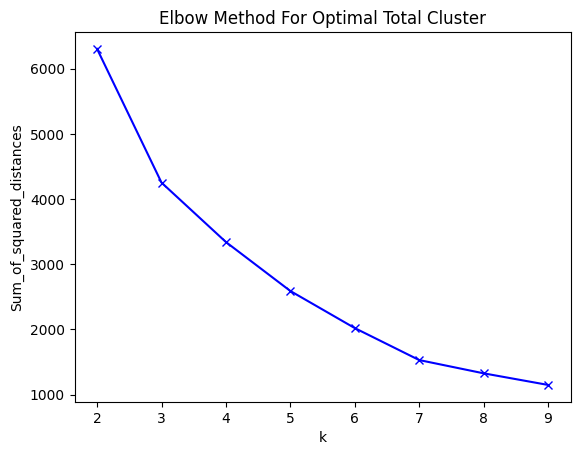

In [32]:
plt.plot(range_cluster, sse_kmeans, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Total Cluster')
plt.show()

In [33]:
for n in range_cluster:
    kmeans = KMeans(n_clusters=n, init="k-means++")
    kmeans.fit(X)
    cluster_labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={n}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9011175545023724
For n_clusters=3, the silhouette score is 0.8771248488332585
For n_clusters=4, the silhouette score is 0.8704759542938665
For n_clusters=5, the silhouette score is 0.8776079931515752
For n_clusters=6, the silhouette score is 0.8762438710689171
For n_clusters=7, the silhouette score is 0.8735976385048383
For n_clusters=8, the silhouette score is 0.8772598407451052
For n_clusters=9, the silhouette score is 0.8766646254354507


In [34]:
kmeans = KMeans(n_clusters=3, init="k-means++")
df['cluster_kmeans'] = kmeans.fit_predict(X)

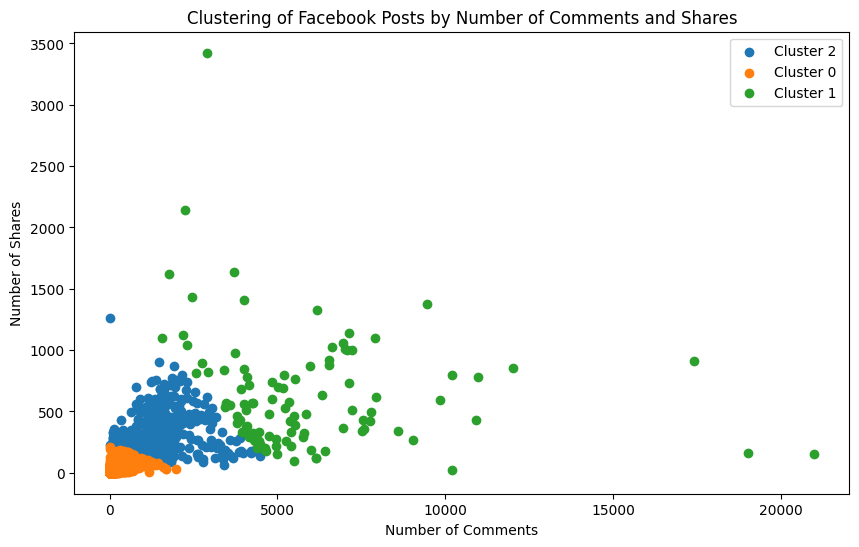

In [35]:
# Visualization of clusters
plt.figure(figsize=(10, 6))

for cluster in df['cluster_kmeans'].unique():
    plt.scatter(df[df['cluster_kmeans'] == cluster]['num_comments'], df[df['cluster_kmeans'] == cluster]['num_shares'], label=f'Cluster {cluster}')

plt.xlabel('Number of Comments')
plt.ylabel('Number of Shares')
plt.title('Clustering of Facebook Posts by Number of Comments and Shares')
plt.legend()
plt.show()

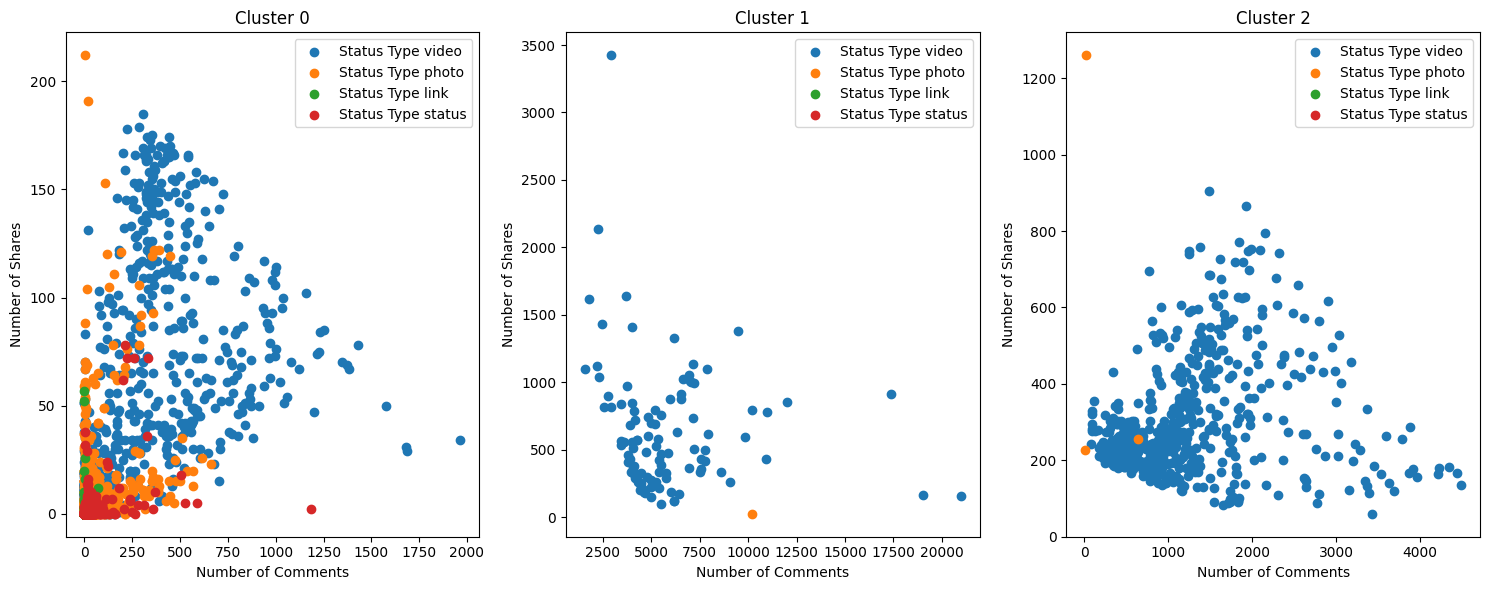

In [36]:
# Visualization of clusters corresponding to the status type
plt.figure(figsize=(15, 6))

for cluster in df['cluster_kmeans'].unique():
    plt.subplot(1, 3, cluster+1)
    for status_type in df['status_type'].unique():
        plt.scatter(df[(df['cluster_kmeans'] == cluster) & (df['status_type'] == status_type)]['num_comments'],
                    df[(df['cluster_kmeans'] == cluster) & (df['status_type'] == status_type)]['num_shares'],
                    label=f'Status Type {status_type}')
    plt.xlabel('Number of Comments')
    plt.ylabel('Number of Shares')
    plt.title(f'Cluster {cluster}')
    plt.legend()

plt.tight_layout()
plt.show()

In [37]:
# Group by cluster k-means and status_type, then count occurrences
cluster_status_counts = df.groupby(['cluster_kmeans', 'status_type']).size()

# Print the results
for cluster in df['cluster_kmeans'].unique():
    print(f"Cluster {cluster}:")
    for status_type in df['status_type'].unique():
        count = cluster_status_counts.get((cluster, status_type), 0)
        print(f"- status type {status_type} = {count}")

Cluster 2:
- status type video = 542
- status type photo = 3
- status type link = 0
- status type status = 0
Cluster 0:
- status type video = 1688
- status type photo = 4284
- status type link = 63
- status type status = 365
Cluster 1:
- status type video = 104
- status type photo = 1
- status type link = 0
- status type status = 0


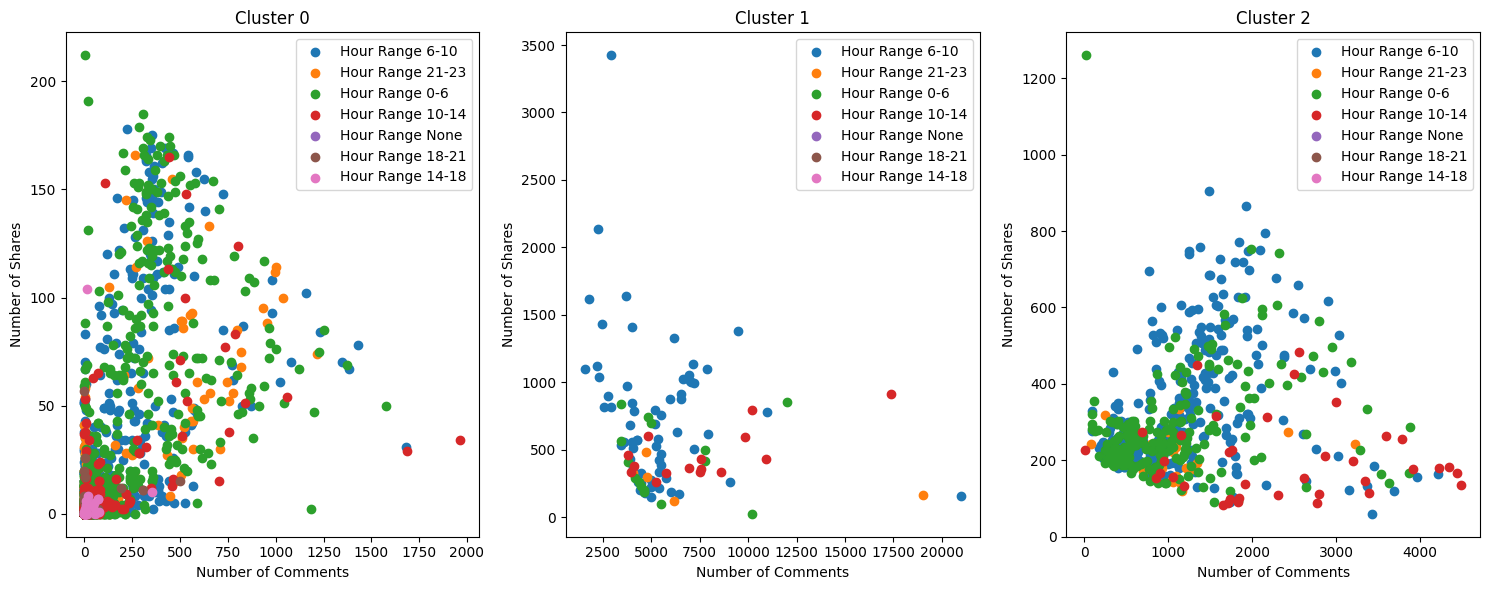

In [38]:
# Visualization of clusters coresponding to hour range
plt.figure(figsize=(15, 6))

for cluster in df['cluster_kmeans'].unique():
    plt.subplot(1, 3, cluster+1)
    for hour_range in df['hour_range'].unique():
        plt.scatter(df[(df['cluster_kmeans'] == cluster) & (df['hour_range'] == hour_range)]['num_comments'],
                    df[(df['cluster_kmeans'] == cluster) & (df['hour_range'] == hour_range)]['num_shares'],
                    label=f'Hour Range {hour_range}')
    plt.xlabel('Number of Comments')
    plt.ylabel('Number of Shares')
    plt.title(f'Cluster {cluster}')
    plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# Group by cluster, hour_range, then count occurrences
cluster_hour_counts = df.groupby(['cluster_kmeans', 'hour_range']).size()

# Print the results
for cluster in df['cluster_kmeans'].unique():
    print(f"Cluster {cluster}:")
    for hour_range in df['hour_range'].unique():
        count = cluster_hour_counts.get((cluster, hour_range), 0)
        print(f"- Hour Range {hour_range}: {count} posts")

Cluster 2:
- Hour Range 6-10: 262 posts
- Hour Range 21-23: 24 posts
- Hour Range 0-6: 208 posts
- Hour Range 10-14: 37 posts
- Hour Range None: [38] posts
- Hour Range 18-21: 0 posts
- Hour Range 14-18: 0 posts
Cluster 0:
- Hour Range 6-10: 2061 posts
- Hour Range 21-23: 567 posts
- Hour Range 0-6: 2775 posts
- Hour Range 10-14: 476 posts
- Hour Range None: [2775] posts
- Hour Range 18-21: 82 posts
- Hour Range 14-18: 38 posts
Cluster 1:
- Hour Range 6-10: 66 posts
- Hour Range 21-23: 5 posts
- Hour Range 0-6: 15 posts
- Hour Range 10-14: 15 posts
- Hour Range None: [476] posts
- Hour Range 18-21: 0 posts
- Hour Range 14-18: 0 posts


## Agglomerative Clustering

In [42]:
# see scores for different number of clusters
sse_values = []
for n in range_cluster:
    ac = AgglomerativeClustering(n_clusters=n, linkage="ward")
    ac.fit(X)
    sse = 0
    for label in np.unique(ac.labels_):
        cluster_points = X[ac.labels_ == label]
        centroid = cluster_points.mean(axis=0)
        sse += np.sum((cluster_points - centroid) ** 2)
    sse_values.append(sse)

In [43]:
# Display SSE scores
for n, sse in zip(range_cluster, sse_values):
    print(f"For n_clusters={n}, the SSE is {sse}")

For n_clusters=2, the SSE is 8172.151705082274
For n_clusters=3, the SSE is 4771.335507062997
For n_clusters=4, the SSE is 3521.8882337062087
For n_clusters=5, the SSE is 2822.8977142422214
For n_clusters=6, the SSE is 2243.4579137850137
For n_clusters=7, the SSE is 1682.194570325705
For n_clusters=8, the SSE is 1469.1593726855842
For n_clusters=9, the SSE is 1259.4384890721249


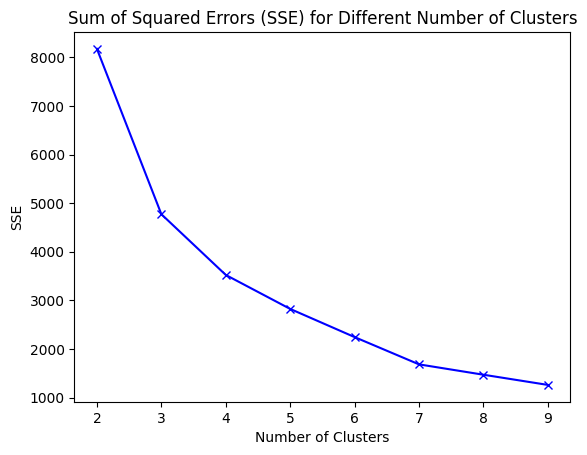

In [44]:
# Plot the SSE values
plt.plot(range_cluster, sse_values, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Sum of Squared Errors (SSE) for Different Number of Clusters')
plt.show()

In [45]:
# Silhouette scores for different number of clusters
silhouettes = []
for n in range_cluster:
  ac = AgglomerativeClustering(n_clusters=n, linkage="ward")
  ac.fit(X)
  cluster_labels = ac.labels_
  silhouette_avg = silhouette_score(X, cluster_labels)
  silhouettes.append(silhouette_avg)
  print(f"For n_clusters={n}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.832332035344296
For n_clusters=3, the silhouette score is 0.848792871238143
For n_clusters=4, the silhouette score is 0.8611296427658448
For n_clusters=5, the silhouette score is 0.8623427614565086
For n_clusters=6, the silhouette score is 0.8630893075463062
For n_clusters=7, the silhouette score is 0.8684836411332332
For n_clusters=8, the silhouette score is 0.8691475079040724
For n_clusters=9, the silhouette score is 0.8693496986855002


In [46]:
# Choose optimal number of clusters (adjust based on silhouette score or other metrics)
optimal_n_clusters = 4

In [47]:
# Perform agglomerative clustering
ac = AgglomerativeClustering(n_clusters=optimal_n_clusters, linkage="ward")
ac.fit(X)
df["cluster_agglomerative"] = ac.labels_

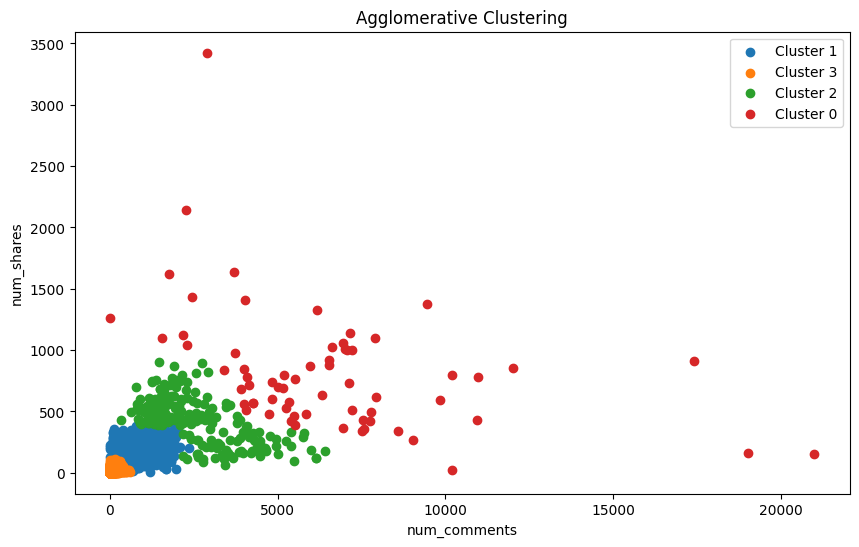

In [48]:
# Visualization of clusters corresponding to the status type
plt.figure(figsize=(10, 6))
for cluster in df["cluster_agglomerative"].unique():
  plt.scatter(
      df[df["cluster_agglomerative"] == cluster]['num_comments'],
      df[df["cluster_agglomerative"] == cluster]['num_shares'],
      label=f"Cluster {cluster}",
  )
plt.xlabel('num_comments')
plt.ylabel('num_shares')
plt.title("Agglomerative Clustering")
plt.legend()
plt.show()

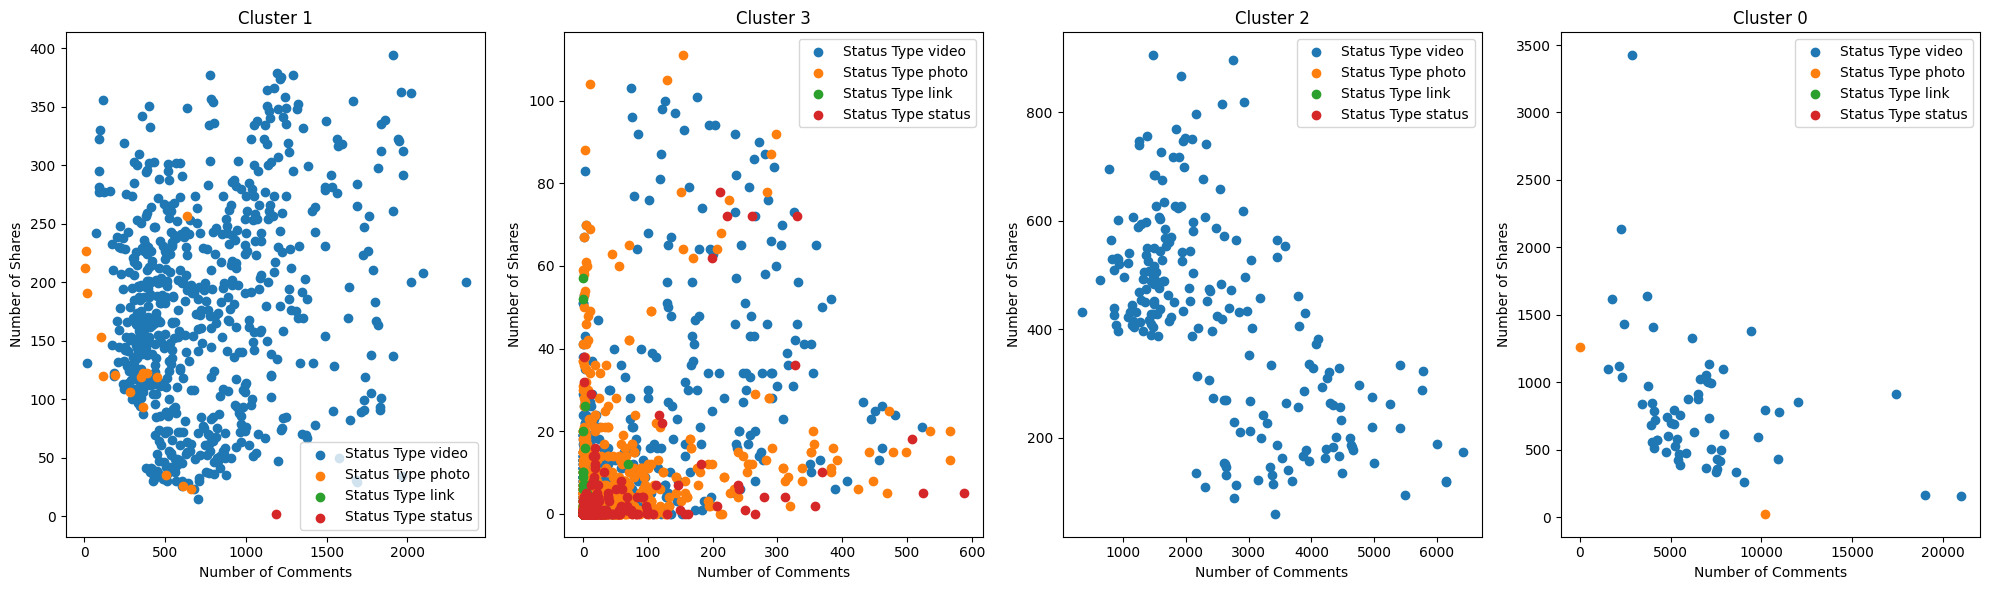

In [49]:
# Visualization of clusters corresponding to the hour range
plt.figure(figsize=(20, 6))

for i, cluster in enumerate(df['cluster_agglomerative'].unique()):
    plt.subplot(1, 4, i+1)
    for status_type in df['status_type'].unique():
        plt.scatter(df[(df['cluster_agglomerative'] == cluster) & (df['status_type'] == status_type)]['num_comments'],
                    df[(df['cluster_agglomerative'] == cluster) & (df['status_type'] == status_type)]['num_shares'],
                    label=f'Status Type {status_type}')
    plt.xlabel('Number of Comments')
    plt.ylabel('Number of Shares')
    plt.title(f'Cluster {cluster}')
    plt.legend()

plt.tight_layout()
plt.show()


In [50]:
# Group by cluster_agglomerative and status_type, then count occurrences
cluster_agglomerative_status_counts = df.groupby(['cluster_agglomerative', 'status_type']).size()

# Print the results
for cluster in df['cluster_agglomerative'].unique():
    print(f"Cluster {cluster}:")
    status_counts = df[df['cluster_agglomerative'] == cluster]['status_type'].value_counts()
    for status_type, count in status_counts.items():
        print(f"- status type {status_type}: {count} posts")

Cluster 1:
- status type video: 666 posts
- status type photo: 16 posts
- status type status: 1 posts
Cluster 3:
- status type photo: 4270 posts
- status type video: 1392 posts
- status type status: 364 posts
- status type link: 63 posts
Cluster 2:
- status type video: 212 posts
Cluster 0:
- status type video: 64 posts
- status type photo: 2 posts


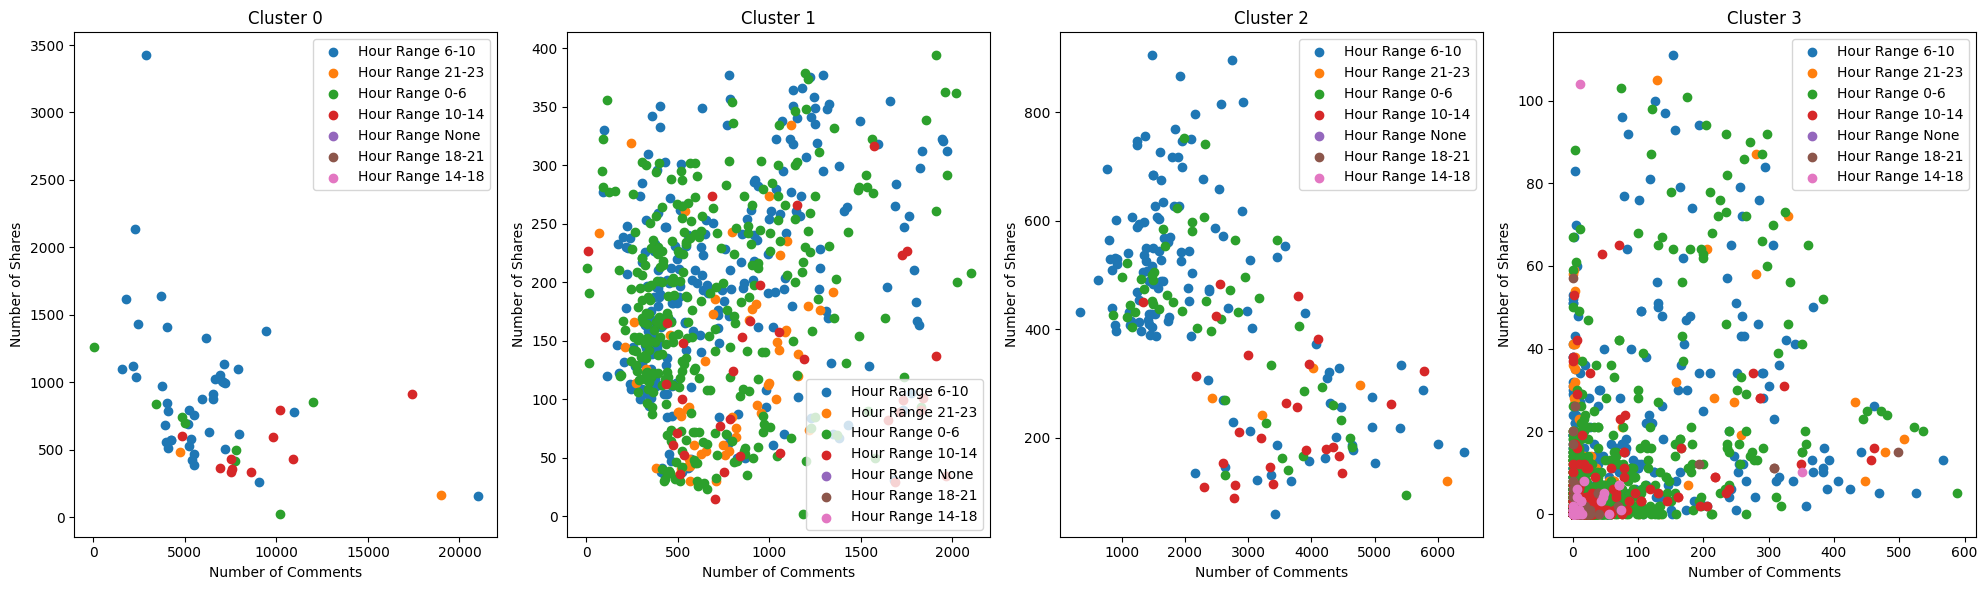

In [51]:
# Visualization of clusters
plt.figure(figsize=(20, 6))

for cluster in df['cluster_agglomerative'].unique():
    plt.subplot(1, 4, cluster+1)
    for hour_range in df['hour_range'].unique():
        plt.scatter(df[(df['cluster_agglomerative'] == cluster) & (df['hour_range'] == hour_range)]['num_comments'],
                    df[(df['cluster_agglomerative'] == cluster) & (df['hour_range'] == hour_range)]['num_shares'],
                    label=f'Hour Range {hour_range}')
    plt.xlabel('Number of Comments')
    plt.ylabel('Number of Shares')
    plt.title(f'Cluster {cluster}')
    plt.legend()

plt.tight_layout()
plt.show()

In [52]:
# Group by cluster_agglomerative, hour_range, then count occurrences
cluster_agglomerative_hour_counts = df.groupby(['cluster_agglomerative', 'hour_range']).size()

# Print the results
for cluster in df['cluster_agglomerative'].unique():
    print(f"Cluster {cluster}:")
    for hour_range in df['hour_range'].unique():
        count = cluster_agglomerative_hour_counts.get((cluster, hour_range), 0)
        print(f"- Hour Range {hour_range}: {count} posts")

Cluster 1:
- Hour Range 6-10: 249 posts
- Hour Range 21-23: 56 posts
- Hour Range 0-6: 310 posts
- Hour Range 10-14: 35 posts
- Hour Range None: [10] posts
- Hour Range 18-21: 0 posts
- Hour Range 14-18: 0 posts
Cluster 3:
- Hour Range 6-10: 1969 posts
- Hour Range 21-23: 533 posts
- Hour Range 0-6: 2629 posts
- Hour Range 10-14: 458 posts
- Hour Range None: [43] posts
- Hour Range 18-21: 82 posts
- Hour Range 14-18: 38 posts
Cluster 2:
- Hour Range 6-10: 128 posts
- Hour Range 21-23: 5 posts
- Hour Range 0-6: 51 posts
- Hour Range 10-14: 25 posts
- Hour Range None: [2] posts
- Hour Range 18-21: 0 posts
- Hour Range 14-18: 0 posts
Cluster 0:
- Hour Range 6-10: 43 posts
- Hour Range 21-23: 2 posts
- Hour Range 0-6: 8 posts
- Hour Range 10-14: 10 posts
- Hour Range None: [8] posts
- Hour Range 18-21: 0 posts
- Hour Range 14-18: 0 posts


## **Comparing K-means and Algomerative Clustering**

In [53]:
# Compare the number of clusters identified by each method
print(f"- Number of clusters in Agglomerative: {len(df['cluster_agglomerative'].unique())}")
print(f"- Number of clusters in KMeans: {len(df['cluster_kmeans'].unique())}")

- Number of clusters in Agglomerative: 4
- Number of clusters in KMeans: 3


In [54]:
# Calculate metrics such as the Jaccard index or Rand index to measure similarity
from sklearn.metrics import adjusted_rand_score
jaccard_index = adjusted_rand_score(df["cluster_agglomerative"], df["cluster_kmeans"])
print(f"- Jaccard Index: {jaccard_index}")


- Jaccard Index: 0.7464515354060133
